# Ridge Regression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = (0.5 * x**2 + x + 2) + np.random.normal(0, 1, size=100)

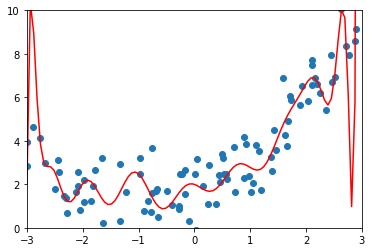

In [13]:
# Simulate a overfirring model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 600)

def plot_model(model):
    x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(x_plot)
    plt.scatter(x, y)
    plt.plot(x_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 10])
    plt.show()

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

plot_model(poly_reg)

6.989314392310922


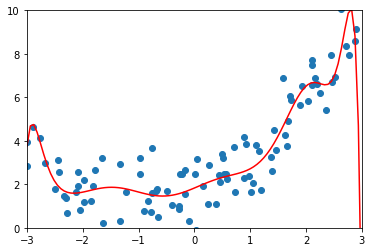

In [18]:
from sklearn.linear_model import Ridge
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

ridge1_reg = RidgeRegression(degree=20, alpha=0.0001)
ridge1_reg.fit(X_train, y_train)
y_ridge_predict = ridge1_reg.predict(X_test)
print(mean_squared_error(y_test, y_ridge_predict))
plot_model(ridge1_reg)

0.7775683818666036


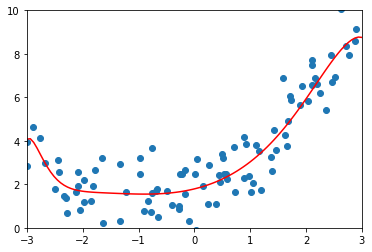

In [19]:
ridge2_reg = RidgeRegression(degree=20, alpha=1)
ridge2_reg.fit(X_train, y_train)
y_ridge2_predict = ridge2_reg.predict(X_test)
print(mean_squared_error(y_test, y_ridge2_predict))
plot_model(ridge2_reg)

6.604492549956009


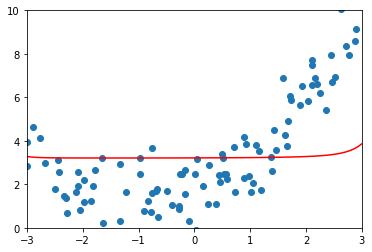

In [21]:
# When alpha is relevantly very large, the J(theta) is dominated by the part with alpha,
# and it's optimal when theta is 0 (which is bsically a line as shown in the graph below)
ridge3_reg = RidgeRegression(degree=20, alpha=10000)
ridge3_reg.fit(X_train, y_train)
y_ridge3_predict = ridge3_reg.predict(X_test)
print(mean_squared_error(y_test, y_ridge3_predict))
plot_model(ridge3_reg)

# LASSO Regression

1.9903999556494858


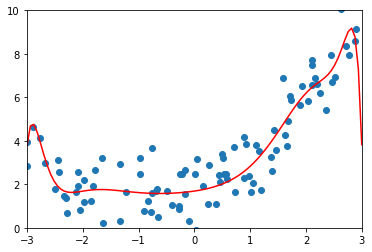

In [23]:
from sklearn.linear_model import Lasso
def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Lasso(alpha=alpha))
    ])

lasso1_reg = RidgeRegression(degree=20, alpha=0.01)
lasso1_reg.fit(X_train, y_train)
y_ridge_predict = lasso1_reg.predict(X_test)
print(mean_squared_error(y_test, y_ridge_predict))
plot_model(lasso1_reg)

0.7775683818666036


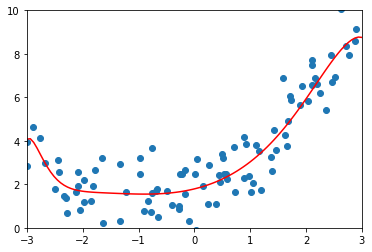

In [24]:
lasso2_reg = RidgeRegression(degree=20, alpha=1)
lasso2_reg.fit(X_train, y_train)
y_ridge_predict = lasso2_reg.predict(X_test)
print(mean_squared_error(y_test, y_ridge_predict))
plot_model(lasso2_reg)

6.604492549956009


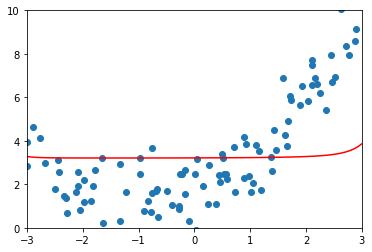

In [26]:
lasso3_reg = RidgeRegression(degree=20, alpha=10000)
lasso3_reg.fit(X_train, y_train)
y_ridge_predict = lasso3_reg.predict(X_test)
print(mean_squared_error(y_test, y_ridge_predict))
plot_model(lasso3_reg)